In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("global_house_purchase_dataset.csv")

In [34]:
df.columns


Index(['House_ID', 'Location', 'Bedrooms', 'Bathrooms', 'Balconies',
       'Area_sqft', 'Furnishing', 'Parking', 'Age_of_Property', 'Floor',
       'Total_Floors', 'House_Type', 'Price_INR'],
      dtype='object')

Basic Data Understanding

In [35]:
df.head(5)

,House_ID,Location,Bedrooms,Bathrooms,Balconies,Area_sqft,Furnishing,Parking,Age_of_Property,Floor,Total_Floors,House_Type,Price_INR
0,H0001,Kolkata,4,4,3,1398,Semi-Furnished,2,14,14,12,Apartment,20132337
1,H0002,Mumbai,3,4,2,1387,Semi-Furnished,2,5,7,8,Independent House,2218954
2,H0003,Pune,5,2,2,3395,Semi-Furnished,2,26,4,19,Independent House,24140486
3,H0004,Kolkata,1,4,3,3854,Furnished,1,25,5,11,Independent House,16444877
4,H0005,Hyderabad,5,4,2,808,Semi-Furnished,0,3,8,14,Independent House,10363441


In [36]:
df.shape

(2000, 13)

In [37]:
df.columns

Index(['House_ID', 'Location', 'Bedrooms', 'Bathrooms', 'Balconies',
       'Area_sqft', 'Furnishing', 'Parking', 'Age_of_Property', 'Floor',
       'Total_Floors', 'House_Type', 'Price_INR'],
      dtype='object')

In [38]:
df.dtypes

,0
House_ID,object
Location,object
Bedrooms,int64
Bathrooms,int64
Balconies,int64
Area_sqft,int64
Furnishing,object
Parking,int64
Age_of_Property,int64
Floor,int64


In [39]:
df.isnull().sum()

,0
House_ID,0
Location,0
Bedrooms,0
Bathrooms,0
Balconies,0
Area_sqft,0
Furnishing,0
Parking,0
Age_of_Property,0
Floor,0


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.describe()

,Bedrooms,Bathrooms,Balconies,Area_sqft,Parking,Age_of_Property,Floor,Total_Floors,Price_INR
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2.000000e+03
mean,3.039000,2.50300,1.517000,2322.867500,0.983500,14.648000,7.487500,12.03650,1.338740e+07
std,1.423901,1.12411,1.115497,994.441572,0.828596,8.501131,4.016829,4.38027,6.853226e+06
min,1.000000,1.00000,0.000000,601.000000,0.000000,0.000000,1.000000,5.00000,1.523439e+06
25%,2.000000,1.00000,1.000000,1473.000000,0.000000,7.000000,4.000000,8.00000,7.250237e+06
50%,3.000000,3.00000,2.000000,2321.500000,1.000000,15.000000,7.000000,12.00000,1.350834e+07
75%,4.000000,4.00000,3.000000,3200.250000,2.000000,22.000000,11.000000,16.00000,1.930819e+07
max,5.000000,4.00000,3.000000,3998.000000,2.000000,29.000000,14.000000,19.00000,2.499638e+07


Exploratory Data Analysis

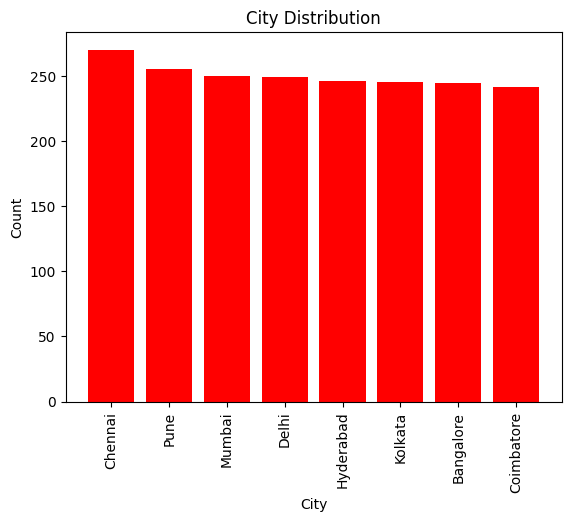

In [42]:
#bar graph between count of houses in each cities
city_counts=df['Location'].value_counts()
city_counts
plt.bar(city_counts.index,city_counts.values,color='red')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Distribution')
plt.xticks(rotation=90)
plt.show()

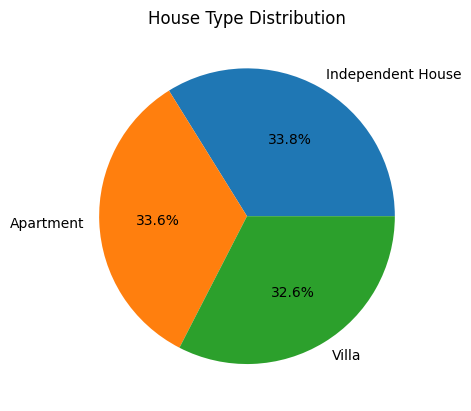

In [43]:
#pie chart shows the percentage of house type among overall
house_type_counts=df['House_Type'].value_counts()
house_type_counts
plt.pie(house_type_counts.values,labels=house_type_counts.index,autopct='%1.1f%%')
plt.title('House Type Distribution')
plt.show()

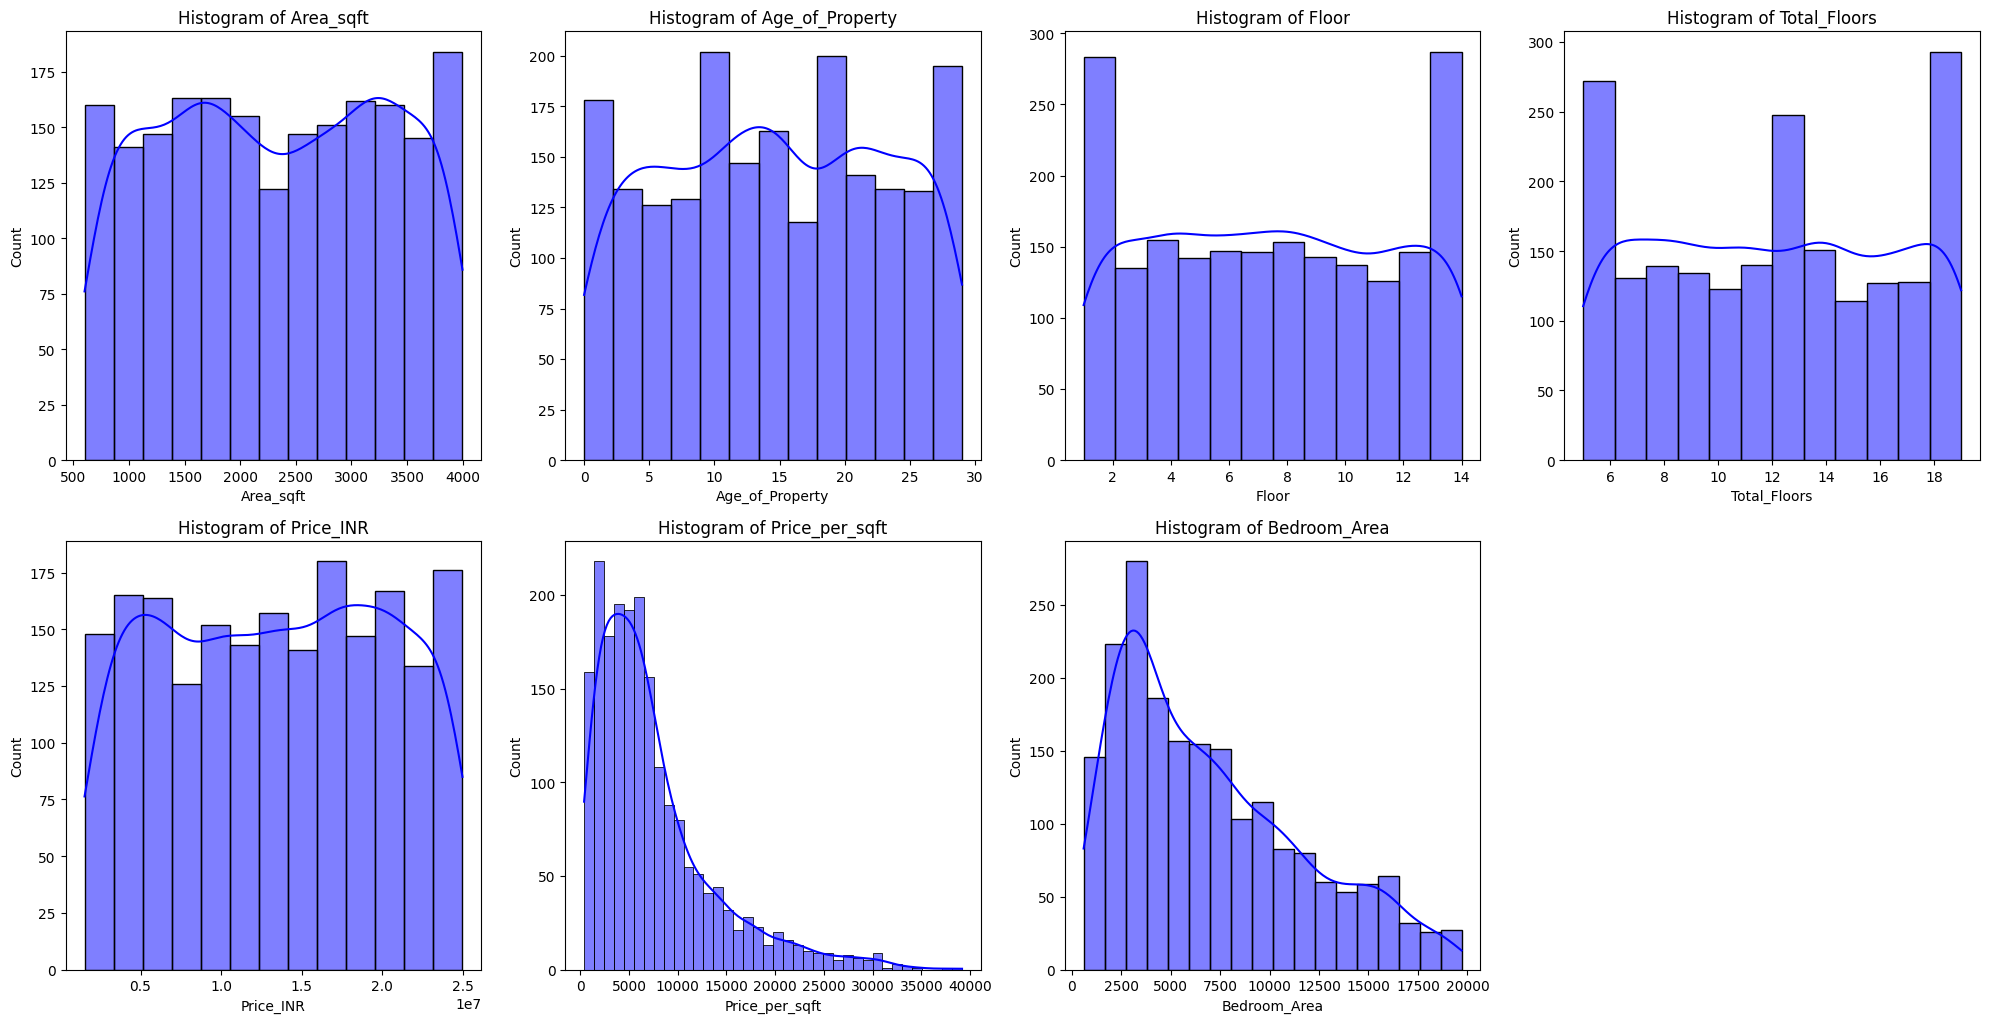

In [44]:
df['Price_per_sqft']=df['Price_INR']/df['Area_sqft']
df['Bedroom_Area']=df['Bedrooms']*df['Area_sqft']


#histogram shows the type of distributions
plt.figure(figsize=(20,15))
plotnumber=1
datas=[
      'Area_sqft', 'Age_of_Property', 'Floor',
       'Total_Floors', 'Price_INR', 'Price_per_sqft',
       'Bedroom_Area']
for data in datas:
    plt.subplot(3,4,plotnumber)
    plotnumber+=1
    sns.histplot(df[data],color='blue',kde=True)
    plt.title(f'Histogram of {data}')
plt.tight_layout()

In [45]:
df['Price_INR'].skew()

np.float64(-0.022716668959654036)

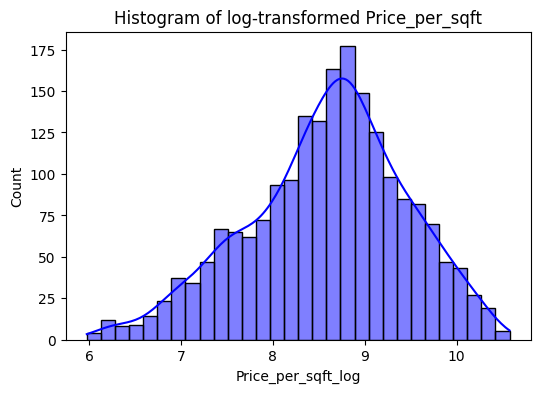

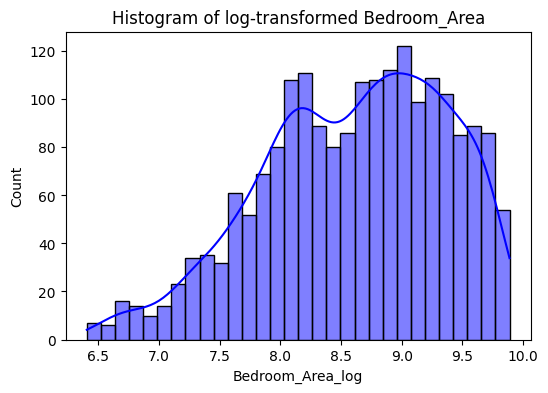

In [66]:
# Assuming df is your DataFrame
# For highly right-skewed variables:
for col in ['Price_per_sqft', 'Bedroom_Area']:
    df[f'{col}_log'] = np.log1p(df[col])  # log1p handles zero/negative values safely.

    plt.figure(figsize=(6,4))
    sns.histplot(df[f'{col}_log'], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of log-transformed {col}')
    plt.show()


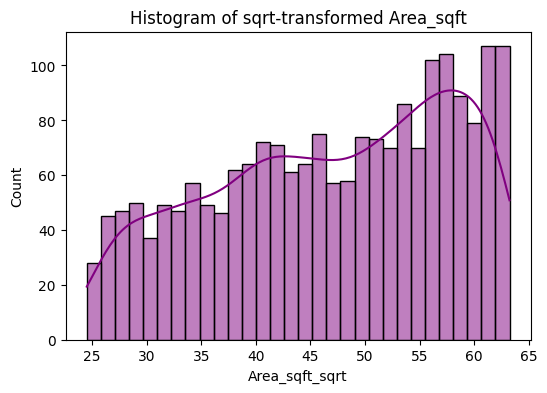

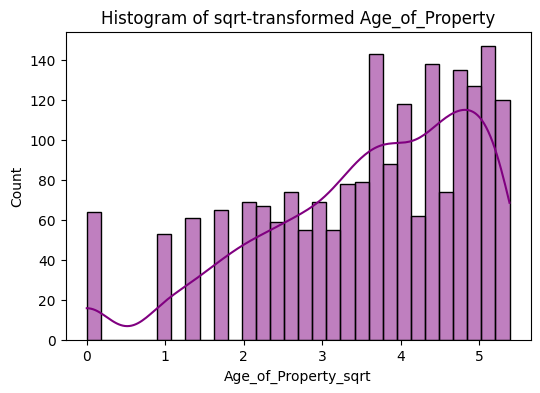

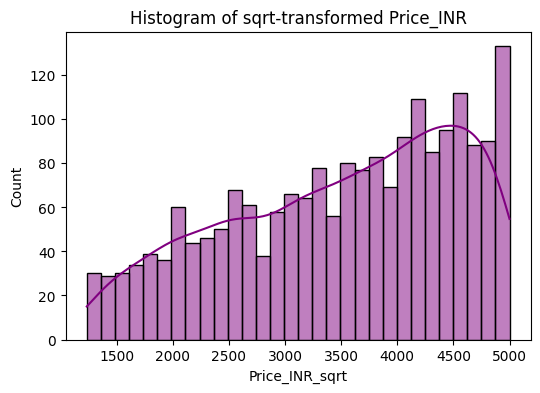

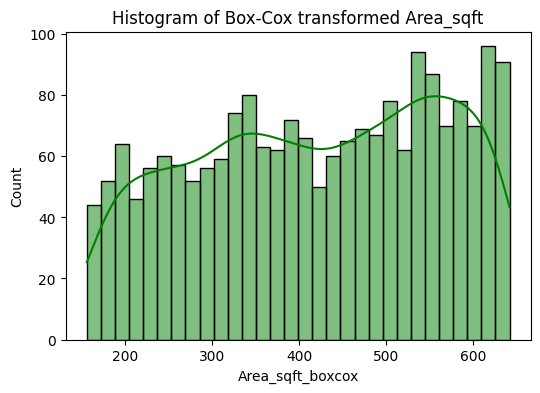

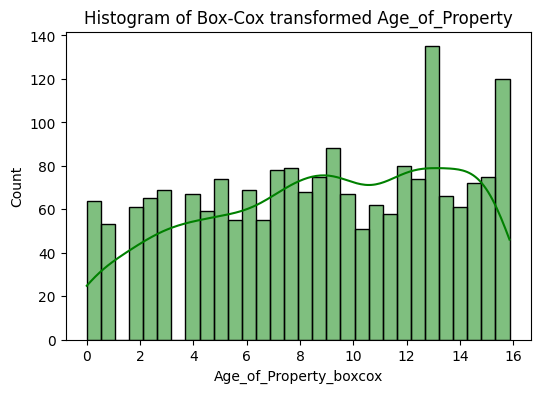

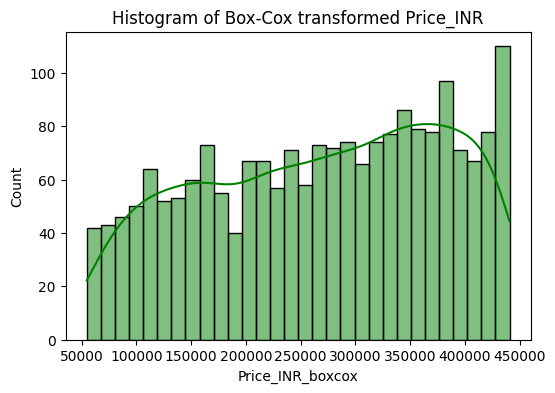

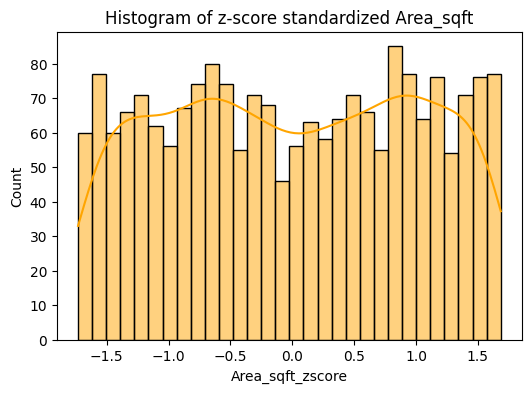

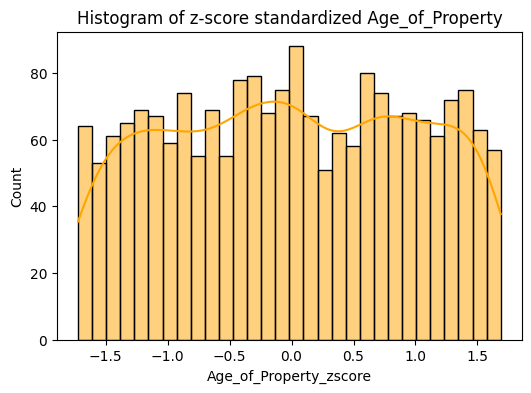

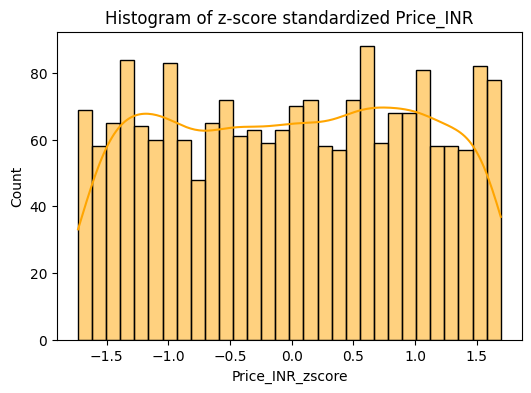

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Replace 'df' with your actual DataFrame variable name.

columns = ['Area_sqft', 'Age_of_Property', 'Price_INR']

# Square Root Transformation
for col in columns:
    df[f'{col}_sqrt'] = np.sqrt(df[col])

    plt.figure(figsize=(6,4))
    sns.histplot(df[f'{col}_sqrt'], bins=30, kde=True, color='purple')
    plt.title(f'Histogram of sqrt-transformed {col}')
    plt.show()
# Box-Cox Transformation
for col in columns:
    # Box-Cox only for positive values:
    min_val = df[col].min()
    offset = 1 - min_val if min_val <= 0 else 0
    boxcox_transformed, lambda_bc = stats.boxcox(df[col] + offset)
    df[f'{col}_boxcox'] = boxcox_transformed

    plt.figure(figsize=(6,4))
    sns.histplot(df[f'{col}_boxcox'], bins=30, kde=True, color='green')
    plt.title(f'Histogram of Box-Cox transformed {col}')
    plt.show()

# Z-score Standardization
scaler = StandardScaler()
for col in columns:
    df[f'{col}_zscore'] = scaler.fit_transform(df[[col]])

    plt.figure(figsize=(6,4))
    sns.histplot(df[f'{col}_zscore'], bins=30, kde=True, color='orange')
    plt.title(f'Histogram of z-score standardized {col}')
    plt.show()



In [48]:
df.columns

Index(['House_ID', 'Location', 'Bedrooms', 'Bathrooms', 'Balconies',
       'Area_sqft', 'Furnishing', 'Parking', 'Age_of_Property', 'Floor',
       'Total_Floors', 'House_Type', 'Price_INR', 'Price_per_sqft',
       'Bedroom_Area', 'Price_per_sqft_log', 'Bedroom_Area_log',
       'Price_yeojohnson'],
      dtype='object')

In [49]:
df


,House_ID,Location,Bedrooms,Bathrooms,Balconies,Area_sqft,Furnishing,Parking,Age_of_Property,Floor,Total_Floors,House_Type,Price_INR,Price_per_sqft,Bedroom_Area,Price_per_sqft_log,Bedroom_Area_log,Price_yeojohnson
0,H0001,Kolkata,4,4,3,1398,Semi-Furnished,2,14,14,12,Apartment,20132337,14400.813305,5592,9.575109,8.629271,1.188125
1,H0002,Mumbai,3,4,2,1387,Semi-Furnished,2,5,7,8,Independent House,2218954,1599.822639,4161,7.378273,8.333751,-1.358308
2,H0003,Pune,5,2,2,3395,Semi-Furnished,2,26,4,19,Independent House,24140486,7110.599705,16975,8.869482,9.739556,0.272861
3,H0004,Kolkata,1,4,3,3854,Furnished,1,25,5,11,Independent House,16444877,4266.963415,3854,8.358892,8.257126,-0.329060
4,H0005,Hyderabad,5,4,2,808,Semi-Furnished,0,3,8,14,Independent House,10363441,12826.040842,4040,9.459311,8.304247,1.030895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,H1996,Chennai,1,3,2,1319,Furnished,0,2,4,14,Villa,24931883,18902.109932,1319,9.847082,7.185387,1.568827
1996,H1997,Bangalore,1,1,0,674,Semi-Furnished,2,21,14,8,Independent House,17424646,25852.590504,674,10.160205,6.514713,2.027709
1997,H1998,Chennai,1,3,2,1893,Unfurnished,0,22,7,13,Apartment,16394285,8660.478077,1893,9.066641,7.546446,0.518487
1998,H1999,Kolkata,2,4,2,2522,Semi-Furnished,1,14,10,11,Villa,24551549,9734.952022,5044,9.183581,8.526153,0.667802


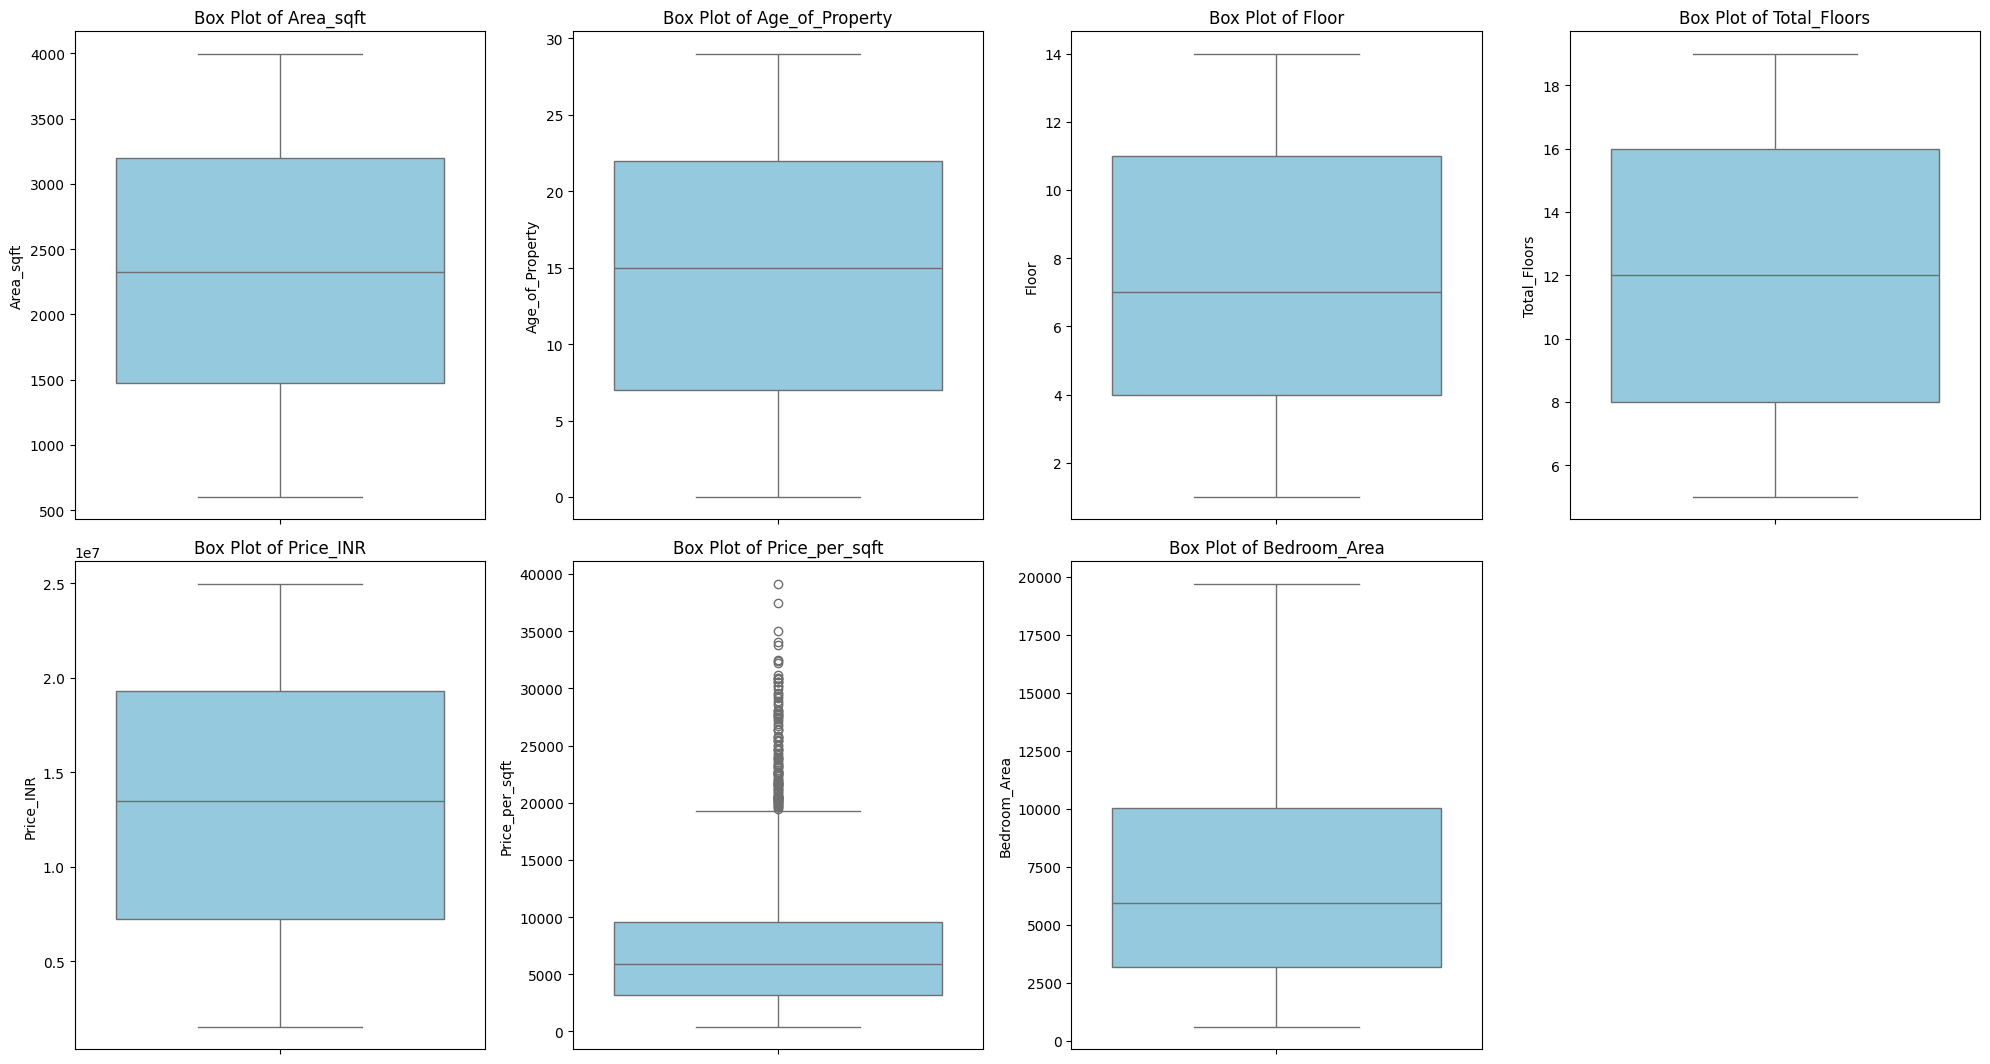

In [50]:
#boxplot shows the data how far
plt.figure(figsize=(20,16))
plotnumber=1
datas=[
       'Area_sqft',  'Age_of_Property', 'Floor',
       'Total_Floors', 'Price_INR', 'Price_per_sqft',
       'Bedroom_Area']
for data in datas:
    plt.subplot(3,4,plotnumber)
    plotnumber+=1
    sns.boxplot(y=df[data], color='skyblue')
    plt.title(f'Box Plot of {data}')
plt.tight_layout()
plt.show()


In [51]:
correlation = df['Age_of_Property'].corr(df['Price_INR'])
print("Correlation:", correlation)

Correlation: -0.008359784758655677


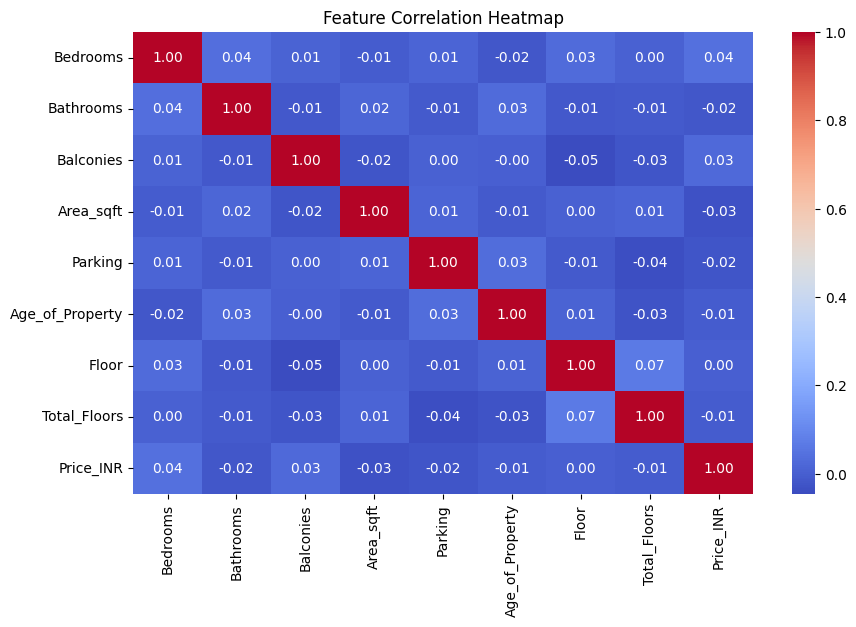

In [52]:
#shows the coorelation of all features in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Bedrooms', 'Bathrooms', 'Balconies',
       'Area_sqft', 'Parking', 'Age_of_Property', 'Floor',
       'Total_Floors', 'Price_INR']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Feature Engineering

In [53]:
df

,House_ID,Location,Bedrooms,Bathrooms,Balconies,Area_sqft,Furnishing,Parking,Age_of_Property,Floor,Total_Floors,House_Type,Price_INR,Price_per_sqft,Bedroom_Area,Price_per_sqft_log,Bedroom_Area_log,Price_yeojohnson
0,H0001,Kolkata,4,4,3,1398,Semi-Furnished,2,14,14,12,Apartment,20132337,14400.813305,5592,9.575109,8.629271,1.188125
1,H0002,Mumbai,3,4,2,1387,Semi-Furnished,2,5,7,8,Independent House,2218954,1599.822639,4161,7.378273,8.333751,-1.358308
2,H0003,Pune,5,2,2,3395,Semi-Furnished,2,26,4,19,Independent House,24140486,7110.599705,16975,8.869482,9.739556,0.272861
3,H0004,Kolkata,1,4,3,3854,Furnished,1,25,5,11,Independent House,16444877,4266.963415,3854,8.358892,8.257126,-0.329060
4,H0005,Hyderabad,5,4,2,808,Semi-Furnished,0,3,8,14,Independent House,10363441,12826.040842,4040,9.459311,8.304247,1.030895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,H1996,Chennai,1,3,2,1319,Furnished,0,2,4,14,Villa,24931883,18902.109932,1319,9.847082,7.185387,1.568827
1996,H1997,Bangalore,1,1,0,674,Semi-Furnished,2,21,14,8,Independent House,17424646,25852.590504,674,10.160205,6.514713,2.027709
1997,H1998,Chennai,1,3,2,1893,Unfurnished,0,22,7,13,Apartment,16394285,8660.478077,1893,9.066641,7.546446,0.518487
1998,H1999,Kolkata,2,4,2,2522,Semi-Furnished,1,14,10,11,Villa,24551549,9734.952022,5044,9.183581,8.526153,0.667802


In [54]:
df['Price_per_sqft']=df['Price_INR']/df['Area_sqft']
df['Price_per_sqft'].head(5)

,Price_per_sqft
0,14400.813305
1,1599.822639
2,7110.599705
3,4266.963415
4,12826.040842


In [55]:
df['Bedroom_Area']=df['Bedrooms']*df['Area_sqft']
df['Bedroom_Area'].head(5)

,Bedroom_Area
0,5592
1,4161
2,16975
3,3854
4,4040


In [56]:

df['Age_Category'] = pd.qcut(df['Age_of_Property'], q=3, labels=['New', 'Mid Age', 'Old'])
df['Age_Category'].head(5)

,Age_Category
0,Mid Age
1,New
2,Old
3,Old
4,New


In [57]:
df['Total_Rooms'] = df['Bedrooms'] + df['Bathrooms'] + df['Balconies']
df['Total_Rooms'].head(5)

,Total_Rooms
0,11
1,9
2,9
3,8
4,11


In [58]:
df.head(5)

,House_ID,Location,Bedrooms,Bathrooms,Balconies,Area_sqft,Furnishing,Parking,Age_of_Property,Floor,Total_Floors,House_Type,Price_INR,Price_per_sqft,Bedroom_Area,Price_per_sqft_log,Bedroom_Area_log,Price_yeojohnson,Age_Category,Total_Rooms
0,H0001,Kolkata,4,4,3,1398,Semi-Furnished,2,14,14,12,Apartment,20132337,14400.813305,5592,9.575109,8.629271,1.188125,Mid Age,11
1,H0002,Mumbai,3,4,2,1387,Semi-Furnished,2,5,7,8,Independent House,2218954,1599.822639,4161,7.378273,8.333751,-1.358308,New,9
2,H0003,Pune,5,2,2,3395,Semi-Furnished,2,26,4,19,Independent House,24140486,7110.599705,16975,8.869482,9.739556,0.272861,Old,9
3,H0004,Kolkata,1,4,3,3854,Furnished,1,25,5,11,Independent House,16444877,4266.963415,3854,8.358892,8.257126,-0.329060,Old,8
4,H0005,Hyderabad,5,4,2,808,Semi-Furnished,0,3,8,14,Independent House,10363441,12826.040842,4040,9.459311,8.304247,1.030895,New,11


In [59]:
df.columns

Index(['House_ID', 'Location', 'Bedrooms', 'Bathrooms', 'Balconies',
       'Area_sqft', 'Furnishing', 'Parking', 'Age_of_Property', 'Floor',
       'Total_Floors', 'House_Type', 'Price_INR', 'Price_per_sqft',
       'Bedroom_Area', 'Price_per_sqft_log', 'Bedroom_Area_log',
       'Price_yeojohnson', 'Age_Category', 'Total_Rooms'],
      dtype='object')

Descriptive Statistics:

In [60]:
print("mean of prices in each location:\n",df.groupby('Location')['Price_INR'].mean())

mean of prices in each location:
 Location
Bangalore     1.292776e+07
Chennai       1.384546e+07
Coimbatore    1.352918e+07
Delhi         1.346123e+07
Hyderabad     1.368228e+07
Kolkata       1.313901e+07
Mumbai        1.297055e+07
Pune          1.349901e+07
Name: Price_INR, dtype: float64


In [61]:
#how many houses are in each locations
print(df['Location'].value_counts())

Location
Chennai       270
Pune          255
Mumbai        250
Delhi         249
Hyderabad     246
Kolkata       245
Bangalore     244
Coimbatore    241
Name: count, dtype: int64


Location    House_Type       
Bangalore   Independent House     95
            Villa                 75
            Apartment             74
Chennai     Apartment            101
            Independent House     93
            Villa                 76
Coimbatore  Apartment             84
            Villa                 80
            Independent House     77
Delhi       Independent House     85
            Villa                 83
            Apartment             81
Hyderabad   Apartment             92
            Villa                 78
            Independent House     76
Kolkata     Villa                 88
            Independent House     81
            Apartment             76
Mumbai      Independent House     91
            Villa                 84
            Apartment             75
Pune        Apartment             89
            Villa                 87
            Independent House     79
Name: count, dtype: int64


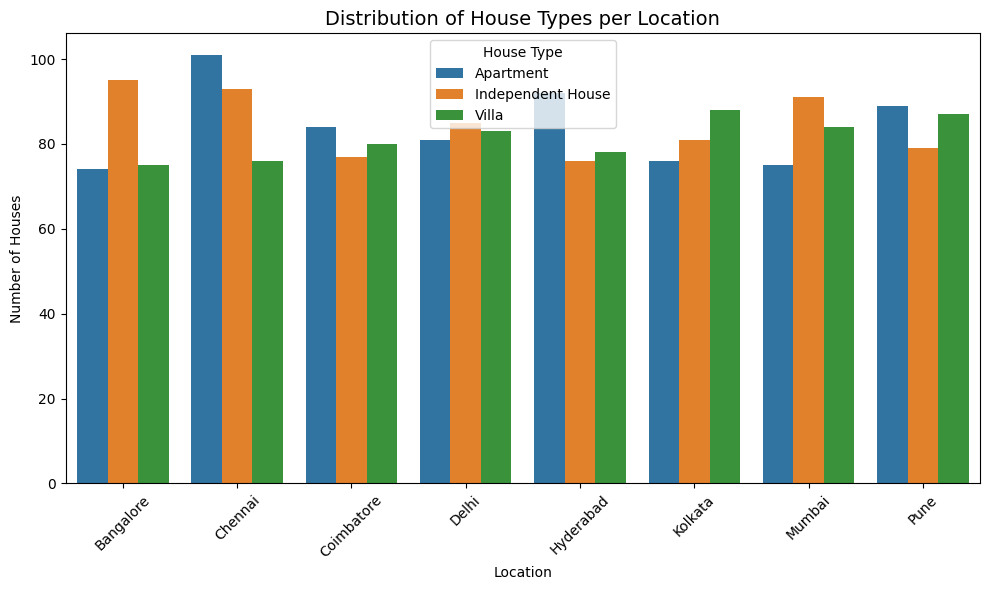

In [62]:
#how many types of houses in locations
print(df.groupby('Location')['House_Type'].value_counts())

#graph representation

counts = df.groupby(['Location', 'House_Type']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='Location', y='Count', hue='House_Type')

plt.title('Distribution of House Types per Location', fontsize=14)
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.legend(title='House Type')
plt.tight_layout()
plt.show()

In [63]:
df.columns

Index(['House_ID', 'Location', 'Bedrooms', 'Bathrooms', 'Balconies',
       'Area_sqft', 'Furnishing', 'Parking', 'Age_of_Property', 'Floor',
       'Total_Floors', 'House_Type', 'Price_INR', 'Price_per_sqft',
       'Bedroom_Area', 'Price_per_sqft_log', 'Bedroom_Area_log',
       'Price_yeojohnson', 'Age_Category', 'Total_Rooms'],
      dtype='object')

In [64]:
# Group by location and house_type, and calculate average price and area
result = df.groupby(['Location', 'House_Type'])[['Price_INR', 'Area_sqft']].mean().reset_index()
print(result)



      Location         House_Type     Price_INR    Area_sqft
0    Bangalore          Apartment  1.214316e+07  2249.540541
1    Bangalore  Independent House  1.374183e+07  2356.978947
2    Bangalore              Villa  1.267072e+07  2461.613333
3      Chennai          Apartment  1.407181e+07  2277.178218
4      Chennai  Independent House  1.335932e+07  2354.548387
5      Chennai              Villa  1.413952e+07  2205.039474
6   Coimbatore          Apartment  1.377957e+07  2367.845238
7   Coimbatore  Independent House  1.293942e+07  2262.610390
8   Coimbatore              Villa  1.383391e+07  2212.150000
9        Delhi          Apartment  1.360623e+07  2413.037037
10       Delhi  Independent House  1.361287e+07  2117.458824
11       Delhi              Villa  1.316444e+07  2155.891566
12   Hyderabad          Apartment  1.387379e+07  2254.608696
13   Hyderabad  Independent House  1.371332e+07  2414.539474
14   Hyderabad              Villa  1.342616e+07  2342.153846
15     Kolkata          

In [65]:
location_area_mean=df.groupby('Location')['Area_sqft'].mean()
print(location_area_mean)

Location
Bangalore     2356.557377
Chennai       2283.522222
Coimbatore    2282.539419
Delhi         2226.421687
Hyderabad     2331.776423
Kolkata       2345.000000
Mumbai        2403.572000
Pune          2355.600000
Name: Area_sqft, dtype: float64
